# Semantic features extraction

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import vgg16
import matplotlib.pyplot as plt
from PIL import Image
import math
from spectrum_utils import *
import os

/home/zhouxian/anaconda3/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Adversarial attack

In [ ]:
file_dir = '/home/zhouxian/zhouxian/Spectrum_test/ImageNet/adv_img_pgd'
file_names = os.listdir(file_dir)
for file_name in file_names:
    #print(file_name)
    if file_name == '.ipynb_checkpoints':
        pass    
    img_path = os.path.join(file_dir, file_name)
    orig_img = os.path.join(img_path, 'original.png')
    adv_img = os.path.join(img_path, 'adversarial.png')
    save_path = os.path.join(img_path, 'semantic.pdf')
    orig, ph, hp, rd, qft = show_img_spectrum(orig_img)
    orig1, ph1, hp1, rd1, qft1 = show_img_spectrum(adv_img)
    data = [
    [orig, ph, hp, rd, qft],
    [orig1, ph1, hp1, rd1, qft1]]

    titles = [
        ['Orig', 'PFT', 'HPF', 'SR', 'QFT'],
        []]

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))

    for i in range(2):
        for j in range(5):
            if titles[i] and j < len(titles[i]):
                axs[i, j].set_title(titles[i][j])
            if j == 0:
                axs[i, j].imshow(data[i][j])
            if j == 2 or j == 4:
                axs[i, j].imshow(data[i][j], cmap='gray_r')
            else: 
                axs[i, j].imshow(data[i][j], cmap='gray')
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.savefig(save_path, dpi=500)
    #plt.show()
    plt.close()

## 2. Corruption

KeyboardInterrupt: 

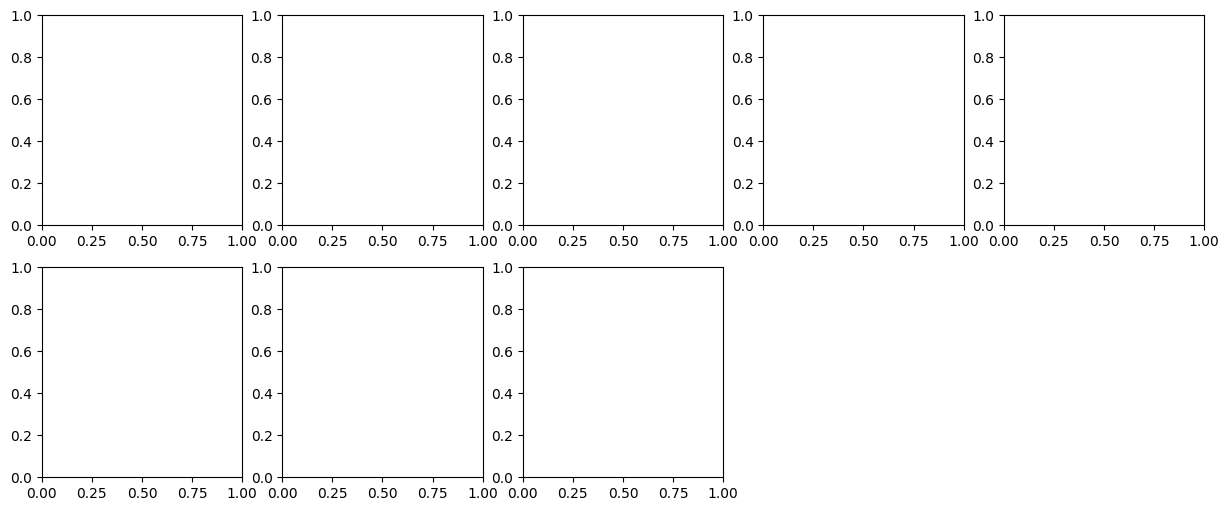

In [5]:
file_dir = '/home/zhouxian/zhouxian/ImageNet-dataset/ImageNet-C'
file_names = os.listdir(file_dir)
for file_name in file_names:
    #if file_name == '.ipynb_checkpoints' or file_name == 'saturate' or file_name == 'defocus_blur' or file_name == 'glass_blur' or file_name == 'brightness' or file_name == 'impulse_noise':
        #pass
    if file_name == 'spatter':
        subfile_dir = os.path.join(file_dir, file_name,'1')
        sub_file_names = os.listdir(subfile_dir)
        for sub_file_name in sub_file_names:
            #print(file_name)
            if sub_file_name == '.ipynb_checkpoints':
                pass  
            images_names = os.listdir(os.path.join(subfile_dir,sub_file_name))
            if images_names[0] != '.ipynb_checkpoints':
                img_path = os.path.join(subfile_dir,sub_file_name,images_names[0])
                orig_img = '/home/zhouxian/zhouxian/ImageNet-dataset/val/{}/{}'.format(sub_file_name,images_names[0])
                save_path = '/home/zhouxian/zhouxian/Spectrum_test/ImageNet/corruption/{}/{}'.format(file_name,sub_file_name)
                if not os.path.exists(save_path):
                    os.makedirs(save_path)
                save_img = os.path.join(save_path,"semantic.pdf")
                orig, ph, hp, rd, qft = show_img_spectrum(orig_img)
                orig1, ph1, hp1, rd1, qft1 = show_img_spectrum(img_path)
                data = [
                [orig, ph, hp, rd, qft],
                [orig1, ph1, hp1, rd1, qft1]]

                titles = [
                    ['Orig', 'PFT', 'HPF', 'SR', 'QFT'],
                    []]

                fig, axs = plt.subplots(2, 5, figsize=(15, 6))

                for i in range(2):
                    for j in range(5):
                        if titles[i] and j < len(titles[i]):
                            axs[i, j].set_title(titles[i][j])
                        if j == 0:
                            axs[i, j].imshow(data[i][j])
                        if j == 2 or j == 4:
                            axs[i, j].imshow(data[i][j], cmap='gray_r')
                        else: 
                            axs[i, j].imshow(data[i][j], cmap='gray')
                        axs[i, j].axis('off')

                plt.tight_layout()
                plt.savefig(save_img, dpi=300)
                #plt.show()
                plt.close()